### Assignment 2 – Frequent Pattern Mining

### Data
A dataset is provided with this assignment that contains retail market basket data from an anonymous Belgian retail store. Each line in the .txt file shows the items purchased in one transaction (transaction IDs are not provided), and items are separated by a space.

In [90]:
import pandas as pd
import numpy as np
import math
import time
import matplotlib.pyplot as plt
%matplotlib inline
import warnings # for hiding warnings
warnings.filterwarnings('ignore')

- #### Read data & Generate a dataset list 

In [91]:
base_path = r'C:\Users\wayiqin\Downloads\Data_mining\Assignment2' # path to the folder that contains the dataset.csv.
dataset_name = 'retail.txt'
dataset_path = rf'{base_path}/{dataset_name}'
dataset = pd.read_csv(dataset_path, sep='\t',header=None,names=["transaction"]) # extract each trasaction in each line
dataset["transaction"] = dataset.transaction.apply(lambda x: x.split()) # split each items by blank space
dataset = dataset.transaction.values.tolist()
lendata = len(dataset)

### 1. Implement the Eclat Algorithm
Implement the Eclat algorithm, as discussed in the lecture notes. For each iteration, you need to keep track of the execution time in seconds (excluding the IO time, i.e., the time that is spent on storing the results into a file or reading in the dataset), the number of generated candidates, and the number of frequent patterns.

#### Solution idea: Find 1-frequent patterns
    
1. Convert the dataset into vertical format, it means that there are several trasaction index put alongside each items in a dictionary
2. By using this vertical dataset, calculate the support of each items by calculating the length of its trasaction set.
3. If the support is more than the minimum support, then the item can be put into the frequent item set

Function: findfrequent_item

Description: convert data into vertical format and find the 1-frequent items

Input:   
- `data`,                   dataType: list,   description: original dataset
- `min_support_count`,       dataType: float,   description: minimum support count of data mining

Output:
- `frequent_item`,                   dataType: list,   description: 1-frequent_items
- `support`,       dataType: list,   description: 1-frequent_items support lists
- `candidates`,     dataType: list,  description:  1-frequent_items support lists
- `itertime`,     dataType: float,  description:  1st. iteration execution time

In [92]:
def findfrequent_item(data, min_support_count):
    invert_data = {}
    candidates = []
    frequent_item = []
    support = []
    trans = 0
    # convert to the vertical format
    for row in data:
        trans += 1
        for item in row:
            if item not in invert_data:
                invert_data[item] = set()
            else:
                invert_data[item].add(trans)
    
    # find the 1-frequent patterns:
    start_time = time.time()
    for item in invert_data.keys():
        candidates.append([item])
    # if satisfied this condition, the item will be added into the frequent_item set
        if len(invert_data[item]) >= min_support_count: 
            frequent_item.append([item])
            support.append(invert_data[item])
    end_time = time.time()
    itertime = end_time - start_time 
    return frequent_item, support, candidates, itertime

#### Solution idea: Find K-frequent patterns
    
1. Begin at 1-frequent patterns, in each iteration combine two frequent items (get the union set of two frequent items), in each iteration combine the two according supportlist  (get the intersection set of two support list) 
2. If the support is more than the minimum support, then the item can be put into the frequent item set

Function: getIntersection

Description: find K-frequent patterns and put them into a set

Input:   
- `frequent_item`,      dataType: list,   description: 1-frequent_items 
- `support`,       dataType: list,   description: 1-frequent_items support lists
- `min_support_count`,       dataType: float,   description: minimum support count of data mining

Output: 
- `sub_frequent_item`,     dataType: list,  description:  K-frequent_items
- `sub_support`,     dataType: list, description:  K-frequent_items support lists
- `candidates`,     dataType: list,  description:  K-support lists

In [93]:
def getIntersection(frequent_item, support, min_support_count):
    sub_frequent_item = []
    sub_support = []
    candidates = []
    k = len(frequent_item[0]) 
    for i in range(len(frequent_item)):
        for j in range(i+1, len(frequent_item)):
    # enumerate all the frequent items
            L1 = list(frequent_item[i])[:k-1]
            L2 = list(frequent_item[j])[:k-1]
    # judge the top k-1 elements are or not the same, if same, then can calculate the intersection of two support list
            if L1 == L2:
                flag = len(list(set(support[i]).intersection(set(support[j]))))
                if flag >= 1:
                    candidates.append(list(set(frequent_item[i]) | set(frequent_item[j])))
                if flag >= min_support_count:
                    sub_frequent_item.append(list(set(frequent_item[i]) | set(frequent_item[j])))
                    sub_support.append(list(set(support[i]).intersection(set(support[j]))))
    return sub_frequent_item, sub_support, candidates

#### Solution idea: Eclat algorithmn
    
1. Dataset: eg. T11 = {A,B,C} => Vertical format: t(AB) = {T11, T25, …}. Then based on this format to find out all frequent patterns.   
2. Mining frequent patterns using vertical format. In each iteration combine two frequent items (get the union set of two frequent items), in each iteration combine the two according supportlist  (get the intersection set of two support list)

#### Function: eclat

Description: find all frequent patterns, support lists and put them into sets

Input:   
- `data`,                   dataType: list,   description: original dataset
- `min_support_count`,       dataType: float,   description: minimum support count of data mining

Output: 
- `frequent_set`,     dataType: nest list,  description:  all frequent_items
- `support_set`,     dataType: nest list, description:  all frequent_items support lists
- `frequent_pattern`,     dataType: list,  description:  1-frequent_items
- `candidates_count`,     dataType: list,  description:  total number of candidates
- `frequent_count`,     dataType: list,  description:  total number of frequent patterns
- `eclat_execution_time`,     dataType: float,  description:  execution time of eclat algorithmn

In [94]:
def eclat(dataset, min_supportcount):
    starteclat = time.time()
    candidates_count = 0
    frequent_count = 0
    frequent_item, support, candidates, itertime = findfrequent_item(dataset, min_supportcount)
    candidates_count += len(candidates)
    frequent_count += len(frequent_item)
    frequent_pattern = [frequent_item[i][0] for i in range(len(frequent_item))]
    iteration = 1
    print(f"iteration{iteration}:\n", f"- execution time: {itertime} seconds \n", f"- candidates: {len(candidates)} \n", f"- frequent itemsets: {len(frequent_item)} \n")
    frequent_set = []
    support_set = []
    frequent_set.append(frequent_item)
    support_set.append(support)
    while len(frequent_item) >= 2:
        start_time = time.time()
        frequent_item, support, candidates = getIntersection(frequent_item, support, min_supportcount)
        if frequent_item:
            iteration += 1
            candidates_count += len(candidates)
            frequent_count += len(frequent_item)
            frequent_set.append(frequent_item)
            support_set.append(support)
            end_time = time.time()
            itertime = end_time - start_time
            print(f"iteration{iteration}:\n", f"- execution time: {itertime} seconds \n", f"- candidates: {len(candidates)} \n", f"- frequent itemsets: {len(frequent_item)} \n")
    endeclat = time.time()
    eclat_execution_time = endeclat - starteclat
    return frequent_set, support_set, frequent_pattern, candidates_count, frequent_count, eclat_execution_time

### Results

In [95]:
min_support = 0.0015
min_supportcount = min_support * len(dataset)
frequent_set, support_set, frequent_pattern, candidates_count, frequent_count, exetime= eclat(dataset, min_supportcount)

# output the pattern file
frequent_patterns = pd.DataFrame(columns = ["frequent pattern", "support count", "support"])
k = 0
for i in range(len(frequent_set)):
    for j in range(len(frequent_set[i])):       
        frequent_patterns.loc[k] = [frequent_set[i][j],len(support_set[i][j]), len(support_set[i][j]) / len(dataset)]
        k += 1

patterns_name = 'patterns.csv'
frequent_patterns.to_csv(patterns_name, index=False)

iteration1:
 - execution time: 0.007996797561645508 seconds 
 - candidates: 16470 
 - frequent itemsets: 1338 

iteration2:
 - execution time: 31.448843002319336 seconds 
 - candidates: 572277 
 - frequent itemsets: 1840 

iteration3:
 - execution time: 12.485551834106445 seconds 
 - candidates: 224144 
 - frequent itemsets: 855 

iteration4:
 - execution time: 1.7203929424285889 seconds 
 - candidates: 42189 
 - frequent itemsets: 168 

iteration5:
 - execution time: 0.01399374008178711 seconds 
 - candidates: 101 
 - frequent itemsets: 12 



### 2. Find Maximal Itemsets
Find the maximal itemset among all the generated frequent patterns. You do not need to implement a maximal itemset mining algorithm (such as the Charm algorithm that allows for mining maximal itemsets without mining the frequent itemsets). Instead, you can simply iterate through the frequent itemsets and identify the maximal ones.

#### Solution idea: Find Maximal algorithmn
    
1. From the last frequent pattern(in variable: frequent_set) to start, suppose that this pattern is maximal pattern. If the intersection between choosed pattern and 1-frequent_pattern set is not empty set, then put this pattern into the maximal pattern set.
2. Then drop the intersection from the 1-frequent_patterns.
3. Choose the next frequent pattern(in variable: frequent_set) to continue to do intersection and repeat step 1 and 2.
4. Until the 1-frequent_patterns is empty

#### Function:  maximal_pattern

Description: find maximal frequent patterns and put them into sets

Input:   
- `frequent_set`,     dataType: nest list,  description:  all frequent_items
- `support_set`,     dataType: nest list, description:  all frequent_items support lists
- `frequent_pattern`,     dataType: list,  description:  1-frequent_items

Output: 
- `submax`,     dataType: list,  description:  all maximal patterns
- `subsupport`,     dataType: list,  description:  according maximal support list

In [96]:
def maximal_pattern(frequent_set, support_set, frequent_pattern):
    x = len(frequent_set)-1
    submax = []
    subsupport = []
    while frequent_pattern:
        while x >= 0:
            for i in range(len(frequent_set[x])-1,-1,-1):
                tempmax = frequent_set[x][i]
                tempsupport = support_set[x][i]
                inter = set(tempmax).intersection(set(frequent_pattern))
                if inter:
                    submax.append(tempmax)
                    subsupport.append(tempsupport)
                    frequent_pattern = [ele for ele in frequent_pattern if ele not in inter]
            x = x-1
    return submax, subsupport

### Results

In [97]:
maximal_patterns, maximum_support = maximal_pattern(frequent_set, support_set, frequent_pattern)
maxsupport_set = [len(i) for i in maximum_support]

# output the maximal file
maxpatterns = pd.DataFrame(columns = ["maximal pattern", "support count", "support"])
k = 0
for i in range(len(maximal_patterns)):       
        maxpatterns.loc[k] = [maximal_patterns[i],len(maximum_support[i]), len(maximum_support[i]) / len(dataset)]
        k += 1
maximal_name = 'maximal.csv'
maxpatterns.to_csv(maximal_name, index=False)

compression_ratio = 1 - (len(maximal_patterns) / frequent_count)
print(f"Compression ratio:\n", f"- frequent itemsets: {frequent_count} \n", f"- maximal patterns: {len(maximal_patterns)} \n", f"- compression ratio: {compression_ratio} \n")

Compression ratio:
 - frequent itemsets: 4213 
 - maximal patterns: 1324 
 - compression ratio: 0.6857346309043437 



### 3. Mine the Association Rules
Implement association rule mining to generate strong association rules from the frequent itemsets generated in Step 2 using the below algorithm. Display the confidence for the top 20 rules with the highest confidence.

#### Solution idea: Mine the Association Rules

1. From the last frequent pattern(veriable: frequent_pattern) to start, enumerate frequent patterns that is in the frequent set and the length is larger than 2, then calculate its subset.
2. Judege the each set in the subset is or not in the frequent set, if it not in, then remove it from the subset. Finally we can get the "actual" subsets, which are in the frequent set.
3. Find out index of the "actual" subsets and the according supportlist.(prepare the calculation of support)
4. Then calculate the support of each subset and the support of the frequent pattern , then get the confidence
5. If the confidence is larger than minimum confidence, then there must be a strong association between the subset and the frequent pattern 

#### Function:  PowerSetsBinary

Description: find out all subesets of input sets

Input:   
- `items`,     dataType: list,  description:  item list need to find the subsets

Output: 
- `com`,     dataType: list,  description:  all subsets of item

In [98]:
def PowerSetsBinary(items):
    N = len(items)
    com = []
    for i in range(2 ** N): 
        combo = []
        for j in range(N):
            if(i>>j)%2:
                combo.append(items[j])
        com.append(combo)
    com.pop(0) # drop the empty set
    com.pop(-1) # drop the same set with its own
    return com

#### Function:  find_in_list_of_list

Description: find out the index of input item in the input list

Input:   
- `mylist`,     dataType: list,  description:  list contains item

Output: 
- `char`,     dataType: list,  description:  items need to find its index

In [99]:
def find_in_list_of_list(mylist, char):
    for sub_list in mylist:
        if char in sub_list:
            return (mylist.index(sub_list), sub_list.index(char))
    raise ValueError("'{char}' is not in list".format(char = char))

#### Function:  find_rule

Description: find out the rules for the given actual subsets and frequent set

Input:   
- `actual_combo`,     dataType: nest list,  description:  subsets are in the frequent set
- `frequent_set`,     dataType: nest list,  description:  all frequent_items
- `support_set`,     dataType: nest list, description:  all frequent_items support lists
- `support_item`,     dataType: list,  description:  according choosed frequent item supportlist
- `frequent_item`,     dataType: list,  description:  choosed frequent item, which is used to find the rules
- `min_confidence`,       dataType: float,   description: minimum confidence of data mining
- `lendata`,       dataType: int,   description: the length of the whole dataset(the number of trasactions)

Output: 
- `rule`,     dataType: DataFrame,  description:  rules contains "antecedent", "consequent", "support count", "support", "confidence"

In [100]:
def find_rule(actual_combo, frequent_set, support_set, support_item, frequent_item, min_confidence, lendata):
    rule = pd.DataFrame(columns = ["antecedent", "consequent", "support count", "support", "confidence"])
    k = 0
    for i in range(len(actual_combo)-1,-1,-1):
        for j in range(len(actual_combo[i])-1,-1,-1):
            combo = actual_combo[i][j]
            
            # for each subset, find out its index from the frequent set
            (p, q) = find_in_list_of_list(frequent_set, combo)
            
            # calculate the support of each subset and the support of the choosed frequent item
            support_X = len(support_set[p][q]) # the support of subset
            support_Z = len(support_item) # the support of the choosed frequent item
            confidence = support_Z / support_X # confidence
            
            if confidence >= min_confidence:
                X = [ele for ele in frequent_item if ele not in combo]
                relativesupport_Z = support_Z / lendata
                # save the rules between X and Z-X
                rule.loc[k] = [combo, X, support_Z, relativesupport_Z, confidence]
                k += 1
    return rule

#### Function:  generateRules

Description: find out the rules from the whole frequent set

Input:   
- `frequent_set`,     dataType: nest list,  description:  all frequent_items
- `support_set`,     dataType: nest list, description:  all frequent_items support lists
- `min_confidence`,       dataType: float,   description: minimum confidence of data mining
- `lendata`,       dataType: int,   description: the length of the whole dataset(the number of trasactions)

Output: 
- `rules`,     dataType: DataFrame,  description:  rules contains "antecedent", "consequent", "support count", "support", "confidence"

In [101]:
def generateRules(frequent_set, support_set, min_confidence, lendata): 
    rules = pd.DataFrame(columns = ["antecedent", "consequent", "support count", "support", "confidence"])
    
    # from the last frequent pattern, begain to find its subsets
    for i in range(len(frequent_set)-1,-1,-1):
        for j in range(len(frequent_set[i])-1,-1,-1):
            frequent_item = frequent_set[i][j]
            support_item = support_set[i][j]
            if len(frequent_item) > 1:
                combo = PowerSetsBinary(frequent_item)
                
                # judge the subsets is or not in the frequent pattern set
                actual_combo = [list(filter(lambda x: x in combo, sublist)) for sublist in frequent_set]
                while [] in actual_combo:
                    actual_combo.remove([])
                
                # then call the rule function to find the association rules between different subsets and taget patterns
                rule = find_rule(actual_combo, frequent_set, support_set, support_item, frequent_item, min_confidence, lendata)
                rules = pd.concat([rules, rule], axis = 0, ignore_index = True)
    return rules

### Results

In [102]:
start_time = time.time()
min_confidence = 0.9
rules = generateRules(frequent_set, support_set, min_confidence, lendata)
end_time = time.time()
rule_time = end_time -start_time

print(f"Strong rules:\n", f"Execution time: {rule_time} seconds\n",f"Strong rules: {len(rules.index)} \n")

for i in range(len(rules.index)):
    print(f"Rule {i+1}: {rules.antecedent[i]} => {rules.consequent[i]} , conf = {rules.confidence[i]} \n")
    rules.antecedent[i] = f"{rules.antecedent[i]} => {rules.consequent[i]}" # change the rule format in rules.csv as required

# save as csv file
rules = rules.drop(['consequent'], axis=1)
rules.rename(columns={'antecedent':'rules'}, inplace = True)
rules_name = 'rules.csv'

rules.to_csv(rules_name, index=False)

Strong rules:
 Execution time: 8.75091028213501 seconds
 Strong rules: 114 

Rule 1: ['2958', '39', '41'] => ['48'] , conf = 0.9467455621301775 

Rule 2: ['48', '41', '570'] => ['39'] , conf = 0.9006622516556292 

Rule 3: ['1327', '41', '38'] => ['39'] , conf = 0.9 

Rule 4: ['790', '48', '41'] => ['38'] , conf = 0.9855072463768116 

Rule 5: ['790', '39', '48'] => ['38'] , conf = 0.9832635983263598 

Rule 6: ['790', '39', '41'] => ['38'] , conf = 0.9934640522875817 

Rule 7: ['390', '39', '48'] => ['38'] , conf = 0.9333333333333333 

Rule 8: ['286', '48', '41'] => ['38'] , conf = 0.98125 

Rule 9: ['48', '110', '41'] => ['38'] , conf = 0.9905437352245863 

Rule 10: ['39', '286', '41'] => ['38'] , conf = 0.9759615384615384 

Rule 11: ['39', '110', '41'] => ['38'] , conf = 0.9922178988326849 

Rule 12: ['39', '48', '110'] => ['38'] , conf = 0.9942140790742526 

Rule 13: ['39', '48', '55'] => ['38'] , conf = 0.968 

Rule 14: ['39', '48', '47'] => ['38'] , conf = 0.9813953488372092 

Rule 

## 4. Sensitivity Analysis
Run the frequent pattern mining function with the following values of minimum support and measure the total number of frequent patterns and generated candidates as well as the execution time. Draw three line plots using the matplotlib library that shows how minimum support (the x-axis) affects the runtime and the number of candidates and frequent itemsets (the y-axis). Note that x and y axes must have proper tiles.

Minimum support values:
0.0005, 0.001, 0.0015, 0.002, 0.0025, 0.003, 0.0035, 0.004, 0.0045, 0.005, 0.0055, 0.006, 0.0065, 0.007, 0.0075, 0.008, 0.0085, 0.009, 0.0095, and 0.01

In [103]:
minimum_support_set = [0.0005, 0.001, 0.0015, 0.002, 0.0025, 0.003, 0.0035, 0.004, 0.0045, 0.005, 0.0055, 0.006, 0.0065, 0.007, 0.0075, 0.008, 0.0085, 0.009, 0.0095, 0.01]
times = []
number_candidates = []
number_frequent_itemsets = []
for i in range(len(minimum_support_set)):
    min_support = minimum_support_set[i]
    min_supportcount = min_support * lendata
    # call the eclat function
    frequent_set, support_set, frequent_pattern, candidates_count, frequent_count, exetime= eclat(dataset, min_supportcount)
    times.append(exetime)
    number_candidates.append(candidates_count)
    number_frequent_itemsets.append(frequent_count)

iteration1:
 - execution time: 0.007935523986816406 seconds 
 - candidates: 16470 
 - frequent itemsets: 3849 

iteration2:
 - execution time: 99.81196689605713 seconds 
 - candidates: 1955084 
 - frequent itemsets: 8118 

iteration3:
 - execution time: 73.48733615875244 seconds 
 - candidates: 1186247 
 - frequent itemsets: 5383 

iteration4:
 - execution time: 18.82168483734131 seconds 
 - candidates: 384135 
 - frequent itemsets: 1482 

iteration5:
 - execution time: 0.6303141117095947 seconds 
 - candidates: 3978 
 - frequent itemsets: 157 

iteration6:
 - execution time: 0.006949424743652344 seconds 
 - candidates: 33 
 - frequent itemsets: 3 

iteration1:
 - execution time: 0.009940385818481445 seconds 
 - candidates: 16470 
 - frequent itemsets: 2097 

iteration2:
 - execution time: 48.41440200805664 seconds 
 - candidates: 1030490 
 - frequent itemsets: 3244 

iteration3:
 - execution time: 26.56670045852661 seconds 
 - candidates: 488123 
 - frequent itemsets: 1781 

iteration

iteration2:
 - execution time: 0.9704043865203857 seconds 
 - candidates: 4450 
 - frequent itemsets: 84 

iteration3:
 - execution time: 0.24132013320922852 seconds 
 - candidates: 614 
 - frequent itemsets: 33 

iteration4:
 - execution time: 0.03095078468322754 seconds 
 - candidates: 109 
 - frequent itemsets: 6 

iteration1:
 - execution time: 0.008995532989501953 seconds 
 - candidates: 16470 
 - frequent itemsets: 86 

iteration2:
 - execution time: 0.8506894111633301 seconds 
 - candidates: 3642 
 - frequent itemsets: 72 

iteration3:
 - execution time: 0.1969594955444336 seconds 
 - candidates: 464 
 - frequent itemsets: 29 

iteration4:
 - execution time: 0.025895118713378906 seconds 
 - candidates: 68 
 - frequent itemsets: 6 

iteration1:
 - execution time: 0.19243836402893066 seconds 
 - candidates: 16470 
 - frequent itemsets: 77 

iteration2:
 - execution time: 0.7479994297027588 seconds 
 - candidates: 2913 
 - frequent itemsets: 61 

iteration3:
 - execution time: 0.16

### Results

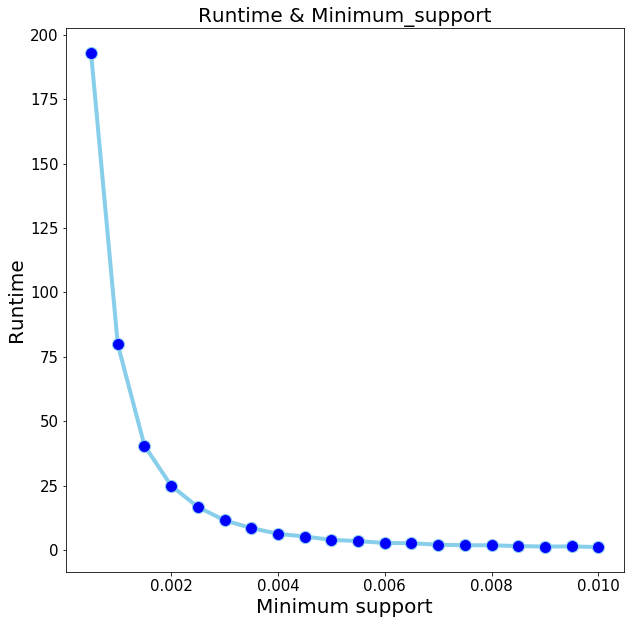

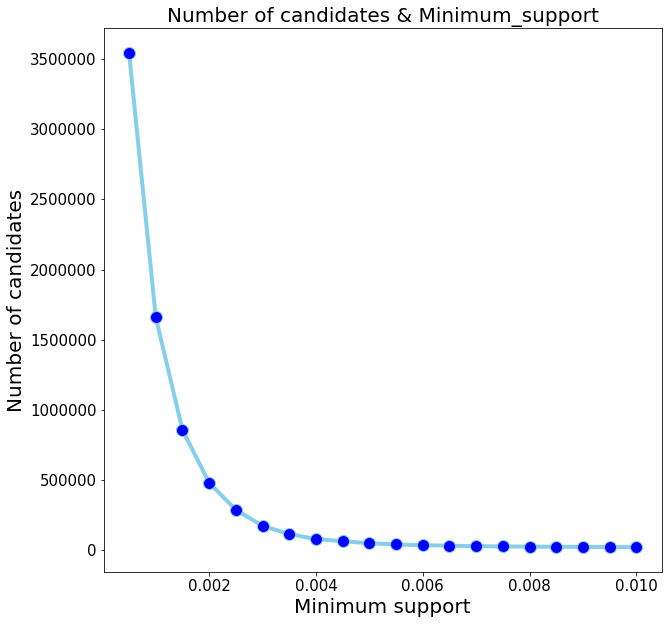

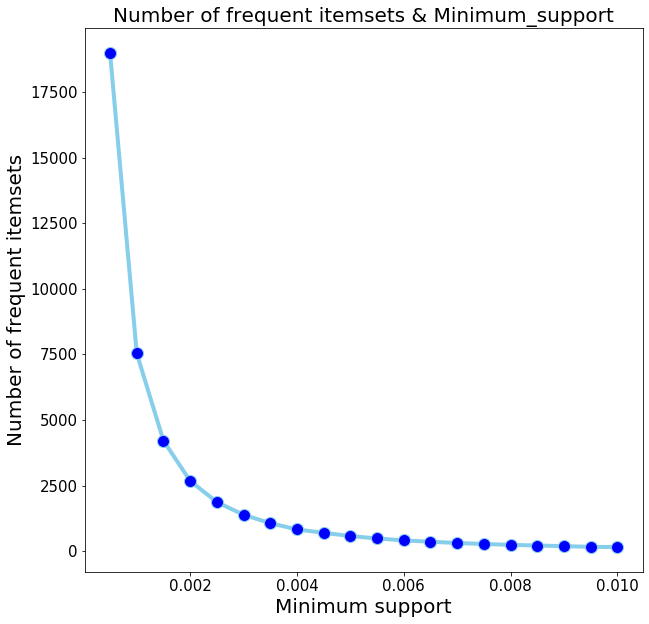

In [104]:
plt.figure(figsize=(10, 10))
plt.title("Runtime & Minimum_support", fontsize = 20.0)
plt.plot(minimum_support_set, times, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.xticks(fontsize = 15.0)
plt.yticks(fontsize = 15.0)
plt.xlabel('Minimum support', fontsize = 20.0)
plt.ylabel('Runtime', fontsize = 20.0)
plt.show()
plt.figure(figsize=(10, 10))
plt.title("Number of candidates & Minimum_support",fontsize = 20.0)
plt.plot(minimum_support_set, number_candidates, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.xticks(fontsize = 15.0)
plt.yticks(fontsize = 15.0)
plt.xlabel('Minimum support', fontsize = 20.0)
plt.ylabel('Number of candidates', fontsize = 20.0)
plt.show()

plt.figure(figsize=(10, 10))
plt.title("Number of frequent itemsets & Minimum_support", fontsize = 20.0)
plt.plot(minimum_support_set, number_frequent_itemsets, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.xticks(fontsize = 15.0)
plt.yticks(fontsize = 15.0)
plt.xlabel('Minimum support', fontsize = 20.0)
plt.ylabel('Number of frequent itemsets', fontsize = 20.0)
plt.show()